# Exercise 2

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv

np.random.seed(1234)

In [28]:
def make_data(n, p, mean=0, cov=1):
    mean_vector = np.full((p,), mean)
    
    cov_diag = np.full((p,), cov)
    cov_matrix = np.diagflat(cov_diag)
    
    observations_x = (np.linspace(-10, 10, num = n*p)).reshape(n, p)
    w = 1.6
    y = w * observations_x + 6
    r = np.random.multivariate_normal(mean_vector, cov_matrix, n)    
    observations_y = y + r
    
    return observations_x, observations_y

In [29]:
x, y = make_data(100, 1000)
print(x.shape)
print(y.shape)

(100, 1000)
(100, 1000)


In [57]:
def extend_x(n, features):
    x, y = make_data(n, 1)
    plt.scatter(x, y)
    plt.show
    xp = []
    for p in range(1, features + 1):
        xp.extend(x[:,0]**p)
    x = np.array(xp).reshape(n, features)
    return x, y

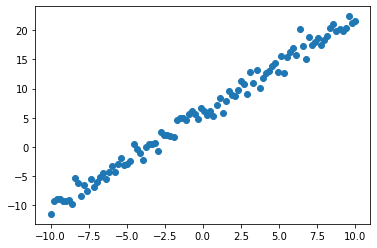

In [58]:
x = extend_x(100, 300)


In [53]:
def linear_regression(train_X, train_Y, test_X, test_Y):
    regression_model = LinearRegression().fit(train_X, train_Y)
    print(regression_model.coef_.shape)

    train_results = regression_model.predict(train_X)
    test_results = regression_model.predict(test_X)

    train_error = mean_squared_error(train_Y, train_results)
    test_error = mean_squared_error(test_Y, test_results)
    parameters_norm = np.linalg.norm(regression_model.coef_)
    if (p < 5):
        print(regression_model.coef_)
    
    return train_error, test_error, parameters_norm

In [54]:
def test_regression(train_X, train_Y, test_X, test_Y, p):
    train_X = train_X[:,:p]
    test_X = test_X[:,:p]
    
    train_error, test_error, parameters_norm = linear_regression(train_X, train_Y, test_X, test_Y)
    
    return train_error, test_error, parameters_norm

In [55]:
n_train = 100
n_test = 50
max_features = 300

train_X, train_Y = extend_x(n_train, max_features)
test_X, test_Y = extend_x(n_test, max_features)
#train_X, train_Y = make_data(n_train, max_features, mean=0, cov=1)
#test_X, test_Y = make_data(n_test, max_features, mean=0, cov=1)


ps = []
train_errors = []
test_errors = []
parameters_norms = []
with open('linear_regression_results.csv', 'w', newline='') as fout:
    writer = csv.DictWriter(fout, fieldnames=['# parameters', 'train loss', 'test loss', 'parameters norm'])
    writer.writeheader()
    for p in range(1, max_features, 1):
        train_error, test_error, parameters_norm = test_regression(train_X, train_Y, test_X, test_Y, p)
        ps.append(p)
        train_errors.append(train_error)
        test_errors.append(test_error)
        parameters_norms.append(parameters_norm)

        print('p: {} | train loss: {:.5f}; test loss: {:.5f}; norm: {:.5f}'.format(p, train_error, test_error, parameters_norm))

        writer.writerow({
            '# parameters': p,
            'train loss': train_error,
            'test loss': test_error,
            'parameters norm': parameters_norm
        })

(1, 1)
[[1.58358843e-297]]
p: 1 | train loss: 85.27652; test loss: 88.10690; norm: 0.00000
(1, 2)
[[ 2.78814390e-293 -1.22067877e-290]]
p: 2 | train loss: 82.20899; test loss: 1825.70680; norm: 0.00000
(1, 3)
[[ 1.87315138e-289 -1.57521260e-286  3.75262723e-284]]
p: 3 | train loss: 79.80788; test loss: 69635838049.92891; norm: 0.00000
(1, 4)
[[ 1.87312886e-289 -1.57518531e-286  3.75250245e-284  2.16374909e-286]]
p: 4 | train loss: 79.80788; test loss: 69634166532.07263; norm: 0.00000
(1, 5)
p: 5 | train loss: 79.80788; test loss: 69634160528.48831; norm: 0.00000
(1, 6)
p: 6 | train loss: 79.80788; test loss: 69634160528.48868; norm: 0.00000
(1, 7)
p: 7 | train loss: 79.80788; test loss: 69634160528.48837; norm: 0.00000
(1, 8)
p: 8 | train loss: 79.80788; test loss: 69634160528.48868; norm: 0.00000
(1, 9)
p: 9 | train loss: 79.80788; test loss: 69634160528.48775; norm: 0.00000
(1, 10)
p: 10 | train loss: 79.80788; test loss: 69634160528.48805; norm: 0.00000
(1, 11)
p: 11 | train loss: 7

(1, 110)
p: 110 | train loss: 77.22271; test loss: 126625305748037042176.00000; norm: 0.00000
(1, 111)
p: 111 | train loss: 77.22271; test loss: 126625305748037042176.00000; norm: 0.00000
(1, 112)
p: 112 | train loss: 77.22271; test loss: 126625305748037107712.00000; norm: 0.00000
(1, 113)
p: 113 | train loss: 77.22271; test loss: 126625305748037107712.00000; norm: 0.00000
(1, 114)
p: 114 | train loss: 77.22271; test loss: 126625305748037107712.00000; norm: 0.00000
(1, 115)
p: 115 | train loss: 77.22271; test loss: 126625305748037107712.00000; norm: 0.00000
(1, 116)
p: 116 | train loss: 77.22271; test loss: 126625305748037107712.00000; norm: 0.00000
(1, 117)
p: 117 | train loss: 77.22271; test loss: 126625305748037107712.00000; norm: 0.00000
(1, 118)
p: 118 | train loss: 77.22271; test loss: 126625305748037107712.00000; norm: 0.00000
(1, 119)
p: 119 | train loss: 77.22271; test loss: 126625305748037107712.00000; norm: 0.00000
(1, 120)
p: 120 | train loss: 77.22271; test loss: 126625305

(1, 226)
p: 226 | train loss: 76.55894; test loss: 3773402843118265344.00000; norm: 0.00000
(1, 227)
p: 227 | train loss: 76.55894; test loss: 3773402843118265344.00000; norm: 0.00000
(1, 228)
p: 228 | train loss: 76.55894; test loss: 3773402838301814784.00000; norm: 0.00000
(1, 229)
p: 229 | train loss: 76.55894; test loss: 3773402838301814784.00000; norm: 0.00000
(1, 230)
p: 230 | train loss: 76.55894; test loss: 3773402838301814784.00000; norm: 0.00000
(1, 231)
p: 231 | train loss: 76.55894; test loss: 3773402838301814784.00000; norm: 0.00000
(1, 232)
p: 232 | train loss: 76.55894; test loss: 3773402838301814784.00000; norm: 0.00000
(1, 233)
p: 233 | train loss: 76.55894; test loss: 3773402973894119424.00000; norm: 0.00000
(1, 234)
p: 234 | train loss: 76.55894; test loss: 3773402973894119424.00000; norm: 0.00000
(1, 235)
p: 235 | train loss: 76.55894; test loss: 3773402973894119424.00000; norm: 0.00000
(1, 236)
p: 236 | train loss: 76.55894; test loss: 3773402973894119424.00000; no

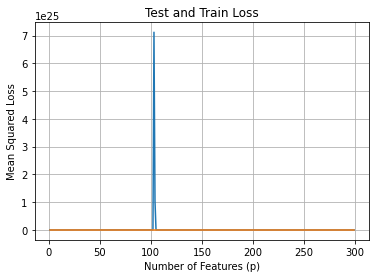

In [56]:
fig, ax = plt.subplots()
plt.plot(ps, test_errors)
ax.plot(ps, train_errors)

ax.set(xlabel='Number of Features (p)', ylabel='Mean Squared Loss',
       title='Test and Train Loss')
ax.grid()

(0.0, 30.0)

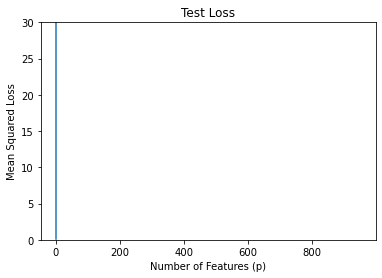

In [13]:
plt.xlabel('Number of Features (p)')
plt.ylabel('Mean Squared Loss')
plt.title('Test Loss')
plt.plot(ps, test_errors)
plt.ylim(0, 30)

(0.0, 5.0)

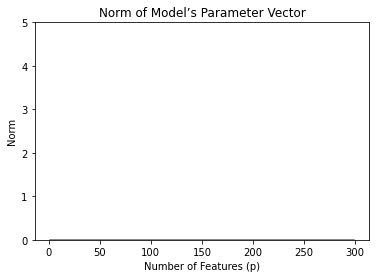

In [52]:
plt.xlabel('Number of Features (p)')
plt.ylabel('Norm')
plt.title('Norm of Model’s Parameter Vector')
plt.plot(ps, parameters_norms)
plt.ylim(0, 5)